<a href="https://colab.research.google.com/github/kanacb/machinelearning/blob/main/PredictCovidCases4Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Covid-19 Cases for Malaysia


Action Steps
1. Get the Data
2. Prepare the data
3. Compare Correlation
4. Linear Regression
5. Print the Stats
6. Plot the Linear Regression 



In [12]:
# Get the data
import pandas as pd
data_url = 'https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/cases_malaysia.csv?raw=true'
data = pd.read_csv(data_url)
print("Loaded {} rows from {}".format(len(data),data_url))

Loaded 639 rows from https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/cases_malaysia.csv?raw=true


In [2]:
#Prepare the data
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data.describe())

       cases_new  cases_import  ...  cluster_detentionCentre  cluster_workplace
count     639.00        639.00  ...                   297.00             297.00
mean     3805.50          8.14  ...                    73.81             750.02
std      5815.39          8.91  ...                    79.05             471.40
min         0.00          0.00  ...                     0.00              57.00
25%        38.50          3.00  ...                    15.00             344.00
50%      1213.00          5.00  ...                    54.00             671.00
75%      4907.00         10.00  ...                   101.00            1116.00
max     24599.00         72.00  ...                   439.00            2338.00

[8 rows x 18 columns]


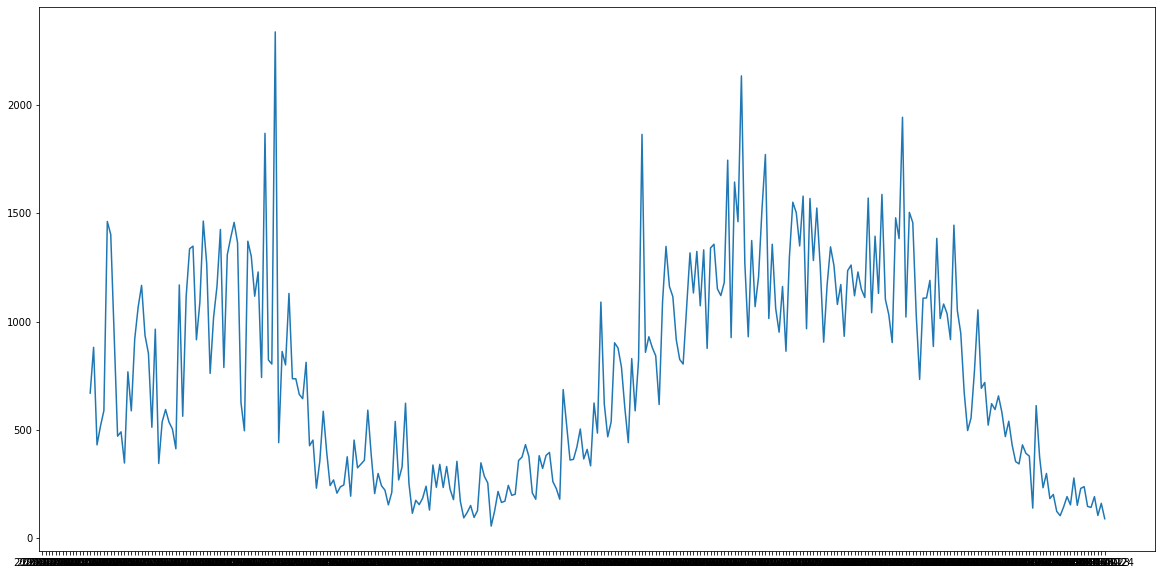

In [13]:
#Plot the data
import matplotlib.pyplot as plt
# Correlation between Num of new cases and workplacecluster
x = data['date']
y = data['cluster_workplace']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()


In [40]:
# Clean the data of NaN
from sklearn.model_selection import train_test_split
for col in data.keys():
  if col=='date': continue
  data[col].fillna(data[col].mean(), inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     639 non-null    object 
 1   cases_new                639 non-null    int64  
 2   cases_import             639 non-null    int64  
 3   cases_recovered          639 non-null    int64  
 4   cases_active             639 non-null    int64  
 5   cases_cluster            639 non-null    float64
 6   cases_pvax               639 non-null    float64
 7   cases_fvax               639 non-null    float64
 8   cases_child              639 non-null    float64
 9   cases_adolescent         639 non-null    float64
 10  cases_adult              639 non-null    float64
 11  cases_elderly            639 non-null    float64
 12  cluster_import           639 non-null    float64
 13  cluster_religious        639 non-null    float64
 14  cluster_community        6

In [41]:

# Split the data into testing and training set
training_columns = data.keys()[1:-1]
label_column = ['cluster_workplace']
X_train, X_test, y_train, y_test = train_test_split(data[training_columns], data[label_column], random_state = 543)
print(f'Original set:        {data.shape}')
print('------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Test features:       {X_test.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Test labels:         {y_test.shape}')

Original set:        (639, 19)
------------------------------
Training features:   (479, 17)
Test features:       (160, 17)
Training labels:     (479, 1)
Test labels:         (160, 1)


In [43]:
# Trainng the model to do the linear Regression
from time import time   
from sklearn.linear_model import LinearRegression
import numpy as np
lin_reg = LinearRegression(fit_intercept = False)
start_time = time()
lin_reg.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start_time) * 1000
# Score using the test data.
score = lin_reg.score(X_test, y_test)

In [44]:
print("Regression Coefficients: {}".format(lin_reg.coef_))
print('Linear regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Variance score on test set: {:.0f}%'.format(score * 100))

Regression Coefficients: [ 1.36381376e-01 -1.71359476e+00  4.26726136e-02  2.66615799e-03
  4.11973939e-01  8.68959340e-02  1.82566383e-01 -7.16097149e-01
 -9.46778894e-01 -1.04734858e-01 -9.88303781e-01  5.38644849e+00
  1.43161578e+00  1.87946441e+00  3.66077324e+00  1.78495864e-02
  7.22195618e-01]
Linear regression model took 3.14 milliseconds to fit.
Variance score on test set: 50%


In [54]:
#Prediction of the Testing
predict = lin_reg.predict(X_test)
results_comparison = X_test.copy()
results_comparison['predicted_cluster_workplace'] = np.round(predict, 2)
results_comparison['actual_cluster_workplace'] = y_test.copy()

In [47]:
#Print the comparison(10)
results_comparison.head(10)

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,predicted_cluster_workplace,actual_cluster_workplace
550,17405,6,12373,172214,2951.0,4157.0,1102.0,2473.0,1185.0,11987.0,1195.0,0.000000,6.000000,621.000000,125.000000,25.000000,74.000000,1486.63,1580.000000
430,1133,8,1148,14122,550.0,15.0,1.0,122.0,71.0,859.0,70.0,0.000000,0.000000,41.000000,1.000000,28.000000,87.000000,285.84,213.000000
101,30,1,83,1710,22.0,0.0,0.0,0.0,0.0,23.0,2.0,0.441077,27.915825,241.787879,30.885522,38.340067,73.814815,678.99,750.016835
508,5150,3,7240,67535,1141.0,220.0,91.0,655.0,362.0,3479.0,487.0,0.000000,7.000000,130.000000,46.000000,4.000000,2.000000,458.83,618.000000
141,8,2,35,987,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.441077,27.915825,241.787879,30.885522,38.340067,73.814815,664.73,750.016835
303,1884,2,883,13823,1572.0,0.0,0.0,68.0,34.0,1158.0,48.0,0.441077,27.915825,241.787879,30.885522,38.340067,73.814815,1389.90,750.016835
583,19268,16,21257,261125,2097.0,5250.0,4641.0,3014.0,1584.0,12553.0,1603.0,0.000000,4.000000,460.000000,37.000000,72.000000,89.000000,885.36,1034.000000
279,799,0,491,10380,392.0,0.0,0.0,70.0,52.0,629.0,46.0,0.441077,27.915825,241.787879,30.885522,38.340067,73.814815,772.22,750.016835
53,117,8,11,728,96.0,0.0,0.0,4.0,8.0,79.0,25.0,0.441077,27.915825,241.787879,30.885522,38.340067,73.814815,664.62,750.016835
343,2295,9,3321,22347,1091.0,0.0,0.0,116.0,61.0,1896.0,117.0,0.000000,2.000000,30.000000,33.000000,0.000000,135.000000,770.85,882.000000


In [56]:
# The cluster values for 23 Oct
data_23Oct = data[data['date']=='2021-10-23']
data_24Oct = data[data['date']=='2021-10-24']
X_test23Oct = data_23Oct.drop(columns=['date','cluster_workplace'])
y_test23Oct = data_23Oct['cluster_workplace']

In [58]:
predicted_23Oct = lin_reg.predict(X_test23Oct)
print(predicted_23Oct)
compare23Oct = pd.DataFrame();
compare23Oct['actual'] = y_test23Oct
compare23Oct['predicted'] = predicted_23Oct
compare23Oct

[270.89664179]


,actual,predicted
637,162.0,270.896642


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Clister Cases')

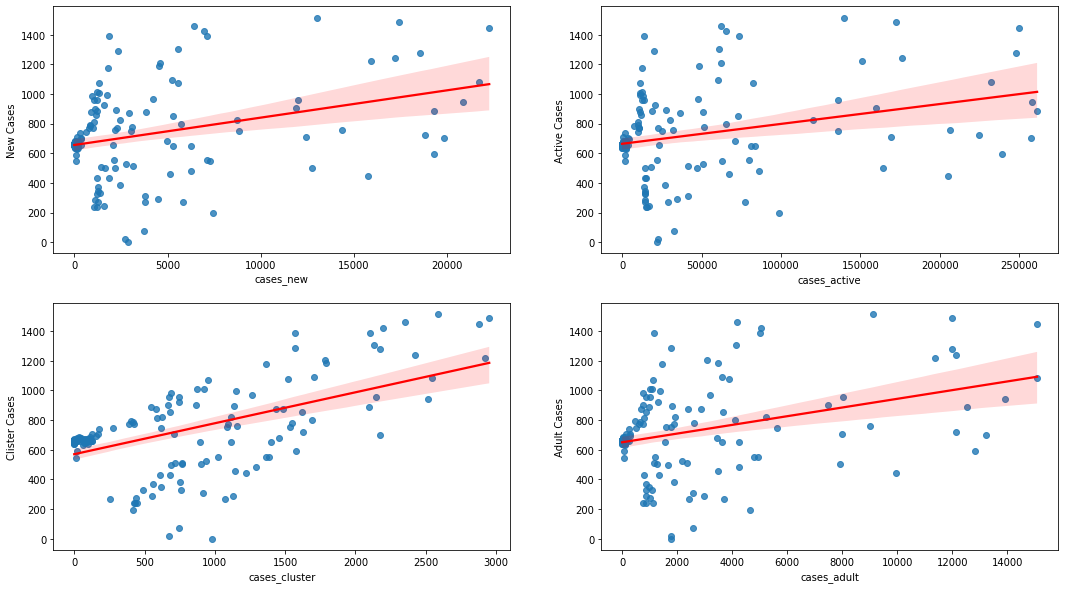

In [66]:
#new Cases
import seaborn as sb
line_color = {'color': 'red'}
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
ax1 = sb.regplot(X_test['cases_new'], 
                np.ravel(predict), 
                line_kws = line_color, 
                ax = ax[0,0])
ax1.set_ylabel('New Cases')

ax2 = sb.regplot(X_test['cases_active'], 
                np.ravel(predict), 
                line_kws = line_color, 
                ax = ax[0,1])
ax2.set_ylabel('Active Cases')

ax3 = sb.regplot(X_test['cases_adult'], 
                np.ravel(predict), 
                line_kws = line_color, 
                ax = ax[1,1])
ax3.set_ylabel('Adult Cases')

ax4 = sb.regplot(X_test['cases_cluster'], 
                np.ravel(predict), 
                line_kws = line_color, 
                ax = ax[1,0])
ax4.set_ylabel('Clister Cases')